# Instalações
### As bibliotecas permitem uma ampla gama de recursos, afim de potencializar e facilitar o desenvolvimento do modelo. 

In [1]:
!pip install emoji 
!pip install emoji_data_python 
!pip install pyspellchecker 
!pip install nltk
!pip install spacy
!pip install matplotlib
!pip install plotly
!pip install emoji_data_python
!pip install scikit-learn
!pip install spellchecker
!pip install wordcloud
!pip install beautifulsoup4
!pip install pyspellchecker
!pip install pyspellchecker==0.5.6
!pip install stopword
!pip install certifi --upgrade
!pip install wordcloud
!python -m spacy download pt_core_news_lg
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.7/353.7 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.4.0-py2.py3-none-any.whl size=350809 sha256=dd1842f85537ab1905e5fa9ffd0671dbc1f75ff430defbac77a3ebfb082eb2d4
  Stored in directory: /root/.cache/pip/wheels/79/29/1c/234cae4632803c2ba4a76a71a679eb1383cf590775714e2a21
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 4.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 20.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2023-05-28 21:36:13.707276: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-28 21:36:14.970927: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.2/568.2 MB 2.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')


In [2]:
import numpy as np
import pandas as pd
import csv
import nltk
import spacy
import re,string, unicodedata
import emoji
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.graph_objects as go
import emoji_data_python
import wordcloud
import gensim
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec
from collections import Counter
from textblob import TextBlob
from textblob import Word
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from spellchecker import SpellChecker
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from plotly.subplots import make_subplots
from bs4 import BeautifulSoup
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('popular')
nltk.download('punkt')


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Carregar dataframe

### Nesta parte do código há implementação do método de carregamento do Dataframe utilizado. Sendo assim, criamos o caminho da pasta no Google Drive e sua leitura usando "pd.read_csv".

In [4]:
df_1 = pd.read_csv('/content/drive/MyDrive/Bases_dados/base_btg.csv')
df_1.head()

df_1 = df_1.rename(columns={'"autor"': 'autor', '"texto"': 'texto'})

df_1

,Column1,id,autor,texto,shortCode,tipoInteracao,tipoMidia,idInteracao,idPai,URL,dataPublicada,dataInsercao,anomalia,probabilidadeAnomalia,processado,contemHyperlink
0,0,1,btgpactual,"Olá, Ana Paula! Como vai?\n\nSentimos muito pe...",CkG9KXjpY2B,reply,REELS,17949834317264462,17988010663613927,https://www.instagram.com/p/CkG9KXjpY2B/c/1798...,2022-10-25 15:35:24,2022-10-25 21:52:54,-1.0,0.0,0.0,-1.0
1,1,2,btgpactual,"Olá, Rosana! Tudo bem?\n\nPara te orientarmos ...",CkG9KXjpY2B,reply,REELS,17968362370910874,17955765434145877,https://www.instagram.com/p/CkG9KXjpY2B/c/1795...,2022-10-25 12:08:06,2022-10-25 21:52:54,-1.0,0.0,0.0,-1.0
2,2,3,btgpactual,@luizantoniojovinodossan 🚀 💙,CkG9KXjpY2B,reply,REELS,17968676113804345,17868806699792839,https://www.instagram.com/p/CkG9KXjpY2B/c/1786...,2022-10-25 08:16:15,2022-10-25 21:52:54,-1.0,0.0,0.0,-1.0
3,3,4,btgpactual,@ronialencar Boa tarde! Tudo bem?\n\nLamentamo...,CkG9KXjpY2B,reply,REELS,18045922528372377,18327741553009776,https://www.instagram.com/p/CkG9KXjpY2B/c/1832...,2022-10-25 09:39:32,2022-10-25 21:52:55,-1.0,0.0,0.0,-1.0
4,4,5,btgpactual,"Oi, Nelson! Tudo bem?\n\nPossuímos soluções co...",CkG9KXjpY2B,reply,REELS,17864851241797946,18159475801266342,https://www.instagram.com/p/CkG9KXjpY2B/c/1815...,2022-10-25 09:38:38,2022-10-25 21:52:55,-1.0,0.0,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4544,4544,3028308,caioaugustofr,"Estão contratando muitos blogueiros, mas eu fi...",Cn4bcg7LM4t,comment,REELS,17965800242039792,-,https://www.instagram.com/p/Cn4bcg7LM4t/c/1796...,2023-01-26 18:41:35,2023-01-26 19:01:29,-1.0,0.0,0.0,-1.0
4545,4545,3028501,btgpactual,@xubs._ 💙,Cn4bcg7LM4t,reply,REELS,18340331500020596,18014457793513467,https://www.instagram.com/p/Cn4bcg7LM4t/c/1801...,2023-01-26 18:44:27,2023-01-26 19:02:16,-1.0,0.0,0.0,-1.0
4546,4546,3028580,btgpactual,Agradecemos o seu feedback! 💙,CnzSr6ltH74,reply,REELS,18004216693521888,17957000375356996,https://www.instagram.com/p/CnzSr6ltH74/c/1795...,2023-01-26 18:45:13,2023-01-26 19:02:35,-1.0,0.0,0.0,-1.0
4547,4547,3029097,je_mascarenhas,Arrasa Micaaa 💙✨🙏🏼👏🏼👏🏼👏🏼👏🏼,Cn4bcg7LM4t,comment,REELS,17969884580114389,-,https://www.instagram.com/p/Cn4bcg7LM4t/c/1796...,2023-01-26 19:26:41,2023-01-26 19:31:45,-1.0,0.0,0.0,-1.0


## Análise quantitativa

#### A análise quantitativa envolve a aplicação de técnicas estatísticas para extrair informações numéricas significativas de uma base de dados de textos classificados. Essas informações podem ajudar a entender as tendências gerais dos dados e identificar padrões interessantes que possam ser explorados mais profundamente.

In [5]:
df_1.head()

,Column1,id,autor,texto,shortCode,tipoInteracao,tipoMidia,idInteracao,idPai,URL,dataPublicada,dataInsercao,anomalia,probabilidadeAnomalia,processado,contemHyperlink
0,0,1,btgpactual,"Olá, Ana Paula! Como vai?\n\nSentimos muito pe...",CkG9KXjpY2B,reply,REELS,17949834317264462,17988010663613927,https://www.instagram.com/p/CkG9KXjpY2B/c/1798...,2022-10-25 15:35:24,2022-10-25 21:52:54,-1.0,0.0,0.0,-1.0
1,1,2,btgpactual,"Olá, Rosana! Tudo bem?\n\nPara te orientarmos ...",CkG9KXjpY2B,reply,REELS,17968362370910874,17955765434145877,https://www.instagram.com/p/CkG9KXjpY2B/c/1795...,2022-10-25 12:08:06,2022-10-25 21:52:54,-1.0,0.0,0.0,-1.0
2,2,3,btgpactual,@luizantoniojovinodossan 🚀 💙,CkG9KXjpY2B,reply,REELS,17968676113804345,17868806699792839,https://www.instagram.com/p/CkG9KXjpY2B/c/1786...,2022-10-25 08:16:15,2022-10-25 21:52:54,-1.0,0.0,0.0,-1.0
3,3,4,btgpactual,@ronialencar Boa tarde! Tudo bem?\n\nLamentamo...,CkG9KXjpY2B,reply,REELS,18045922528372377,18327741553009776,https://www.instagram.com/p/CkG9KXjpY2B/c/1832...,2022-10-25 09:39:32,2022-10-25 21:52:55,-1.0,0.0,0.0,-1.0
4,4,5,btgpactual,"Oi, Nelson! Tudo bem?\n\nPossuímos soluções co...",CkG9KXjpY2B,reply,REELS,17864851241797946,18159475801266342,https://www.instagram.com/p/CkG9KXjpY2B/c/1815...,2022-10-25 09:38:38,2022-10-25 21:52:55,-1.0,0.0,0.0,-1.0


In [6]:
# Identifica o tipo de dado que está contido no objeto
df_1.dtypes

Column1                    int64
id                        object
autor                     object
texto                     object
shortCode                 object
tipoInteracao             object
tipoMidia                 object
idInteracao               object
idPai                     object
URL                       object
dataPublicada             object
dataInsercao              object
anomalia                 float64
probabilidadeAnomalia    float64
processado               float64
contemHyperlink          float64
dtype: object

In [7]:
# Imprime informações sobre o dataset
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4549 entries, 0 to 4548
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Column1                4549 non-null   int64  
 1   id                     4549 non-null   object 
 2   autor                  4449 non-null   object 
 3   texto                  4449 non-null   object 
 4   shortCode              4421 non-null   object 
 5   tipoInteracao          4421 non-null   object 
 6   tipoMidia              4421 non-null   object 
 7   idInteracao            4421 non-null   object 
 8   idPai                  4421 non-null   object 
 9   URL                    4421 non-null   object 
 10  dataPublicada          4421 non-null   object 
 11  dataInsercao           4421 non-null   object 
 12  anomalia               4421 non-null   float64
 13  probabilidadeAnomalia  4421 non-null   float64
 14  processado             4393 non-null   float64
 15  cont

In [8]:
# Imprime os dados estatíscos do dataset
df_1.describe()

,Column1,anomalia,probabilidadeAnomalia,processado,contemHyperlink
count,4549.000000,4421.000000,4421.000000,4393.0,4393.0
mean,2274.000000,-0.993667,-0.006333,0.0,-1.0
std,1313.327517,0.079339,0.079339,0.0,0.0
min,0.000000,-1.000000,-1.000000,0.0,-1.0
25%,1137.000000,-1.000000,0.000000,0.0,-1.0
50%,2274.000000,-1.000000,0.000000,0.0,-1.0
75%,3411.000000,-1.000000,0.000000,0.0,-1.0
max,4548.000000,0.000000,0.000000,0.0,-1.0


### Contagem de nulos e nan

In [9]:
df_1.isnull().sum()

Column1                    0
id                         0
autor                    100
texto                    100
shortCode                128
tipoInteracao            128
tipoMidia                128
idInteracao              128
idPai                    128
URL                      128
dataPublicada            128
dataInsercao             128
anomalia                 128
probabilidadeAnomalia    128
processado               156
contemHyperlink          156
dtype: int64

In [10]:
df_1.isna().sum()

Column1                    0
id                         0
autor                    100
texto                    100
shortCode                128
tipoInteracao            128
tipoMidia                128
idInteracao              128
idPai                    128
URL                      128
dataPublicada            128
dataInsercao             128
anomalia                 128
probabilidadeAnomalia    128
processado               156
contemHyperlink          156
dtype: int64

In [11]:
# Número de elementos que a dimensão (linhas e colunas) possui
df_1.shape

(4549, 16)

In [12]:
df_1.query("texto== 'U+1F680'") # Emoji foguete por exemplo = U+1F680

,Column1,id,autor,texto,shortCode,tipoInteracao,tipoMidia,idInteracao,idPai,URL,dataPublicada,dataInsercao,anomalia,probabilidadeAnomalia,processado,contemHyperlink


In [13]:
df_1['autor'].value_counts()[:10]

btgpactual                 896
luizantoniojovinodossan     76
velhopraisso                34
mnapontes                   31
futuro_bom                  27
luiz_a.j.dos_santos         27
indkmoficial                25
alegalindo_miniindice       21
salomao2346                 20
mocafilho                   19
Name: autor, dtype: int64

In [14]:
df_1.columns

Index(['Column1', 'id', 'autor', 'texto', 'shortCode', 'tipoInteracao',
       'tipoMidia', 'idInteracao', 'idPai', 'URL', 'dataPublicada',
       'dataInsercao', 'anomalia', 'probabilidadeAnomalia', 'processado',
       'contemHyperlink'],
      dtype='object')

## Limpeza do Dataset

In [15]:
duplicados = df_1[df_1.duplicated(keep = 'first')]


In [16]:
duplicados

,Column1,id,autor,texto,shortCode,tipoInteracao,tipoMidia,idInteracao,idPai,URL,dataPublicada,dataInsercao,anomalia,probabilidadeAnomalia,processado,contemHyperlink


In [17]:
df_1 = df_1.dropna()

In [18]:
df_1

,Column1,id,autor,texto,shortCode,tipoInteracao,tipoMidia,idInteracao,idPai,URL,dataPublicada,dataInsercao,anomalia,probabilidadeAnomalia,processado,contemHyperlink
0,0,1,btgpactual,"Olá, Ana Paula! Como vai?\n\nSentimos muito pe...",CkG9KXjpY2B,reply,REELS,17949834317264462,17988010663613927,https://www.instagram.com/p/CkG9KXjpY2B/c/1798...,2022-10-25 15:35:24,2022-10-25 21:52:54,-1.0,0.0,0.0,-1.0
1,1,2,btgpactual,"Olá, Rosana! Tudo bem?\n\nPara te orientarmos ...",CkG9KXjpY2B,reply,REELS,17968362370910874,17955765434145877,https://www.instagram.com/p/CkG9KXjpY2B/c/1795...,2022-10-25 12:08:06,2022-10-25 21:52:54,-1.0,0.0,0.0,-1.0
2,2,3,btgpactual,@luizantoniojovinodossan 🚀 💙,CkG9KXjpY2B,reply,REELS,17968676113804345,17868806699792839,https://www.instagram.com/p/CkG9KXjpY2B/c/1786...,2022-10-25 08:16:15,2022-10-25 21:52:54,-1.0,0.0,0.0,-1.0
3,3,4,btgpactual,@ronialencar Boa tarde! Tudo bem?\n\nLamentamo...,CkG9KXjpY2B,reply,REELS,18045922528372377,18327741553009776,https://www.instagram.com/p/CkG9KXjpY2B/c/1832...,2022-10-25 09:39:32,2022-10-25 21:52:55,-1.0,0.0,0.0,-1.0
4,4,5,btgpactual,"Oi, Nelson! Tudo bem?\n\nPossuímos soluções co...",CkG9KXjpY2B,reply,REELS,17864851241797946,18159475801266342,https://www.instagram.com/p/CkG9KXjpY2B/c/1815...,2022-10-25 09:38:38,2022-10-25 21:52:55,-1.0,0.0,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4544,4544,3028308,caioaugustofr,"Estão contratando muitos blogueiros, mas eu fi...",Cn4bcg7LM4t,comment,REELS,17965800242039792,-,https://www.instagram.com/p/Cn4bcg7LM4t/c/1796...,2023-01-26 18:41:35,2023-01-26 19:01:29,-1.0,0.0,0.0,-1.0
4545,4545,3028501,btgpactual,@xubs._ 💙,Cn4bcg7LM4t,reply,REELS,18340331500020596,18014457793513467,https://www.instagram.com/p/Cn4bcg7LM4t/c/1801...,2023-01-26 18:44:27,2023-01-26 19:02:16,-1.0,0.0,0.0,-1.0
4546,4546,3028580,btgpactual,Agradecemos o seu feedback! 💙,CnzSr6ltH74,reply,REELS,18004216693521888,17957000375356996,https://www.instagram.com/p/CnzSr6ltH74/c/1795...,2023-01-26 18:45:13,2023-01-26 19:02:35,-1.0,0.0,0.0,-1.0
4547,4547,3029097,je_mascarenhas,Arrasa Micaaa 💙✨🙏🏼👏🏼👏🏼👏🏼👏🏼,Cn4bcg7LM4t,comment,REELS,17969884580114389,-,https://www.instagram.com/p/Cn4bcg7LM4t/c/1796...,2023-01-26 19:26:41,2023-01-26 19:31:45,-1.0,0.0,0.0,-1.0


In [19]:
df_1.isnull().sum()

Column1                  0
id                       0
autor                    0
texto                    0
shortCode                0
tipoInteracao            0
tipoMidia                0
idInteracao              0
idPai                    0
URL                      0
dataPublicada            0
dataInsercao             0
anomalia                 0
probabilidadeAnomalia    0
processado               0
contemHyperlink          0
dtype: int64

In [20]:
array_comentarios = df_1['texto'].values.flatten().astype(str)

In [21]:
# Contagem dos comentários feitos pelo BTG
df_1.query("autor == 'btgpactual'").value_counts()

Column1  id       autor       texto                                                                                                                                shortCode    tipoInteracao  tipoMidia  idInteracao        idPai              URL                                                                              dataPublicada        dataInsercao         anomalia  probabilidadeAnomalia  processado  contemHyperlink
0        1        btgpactual  Olá, Ana Paula! Como vai?\n\nSentimos muito pelo ocorrrido. Te enviamos uma mensagem privada para te ajudar com mais assertividade!  CkG9KXjpY2B  reply          REELS      17949834317264462  17988010663613927  https://www.instagram.com/p/CkG9KXjpY2B/c/17988010663613927/r/17949834317264462  2022-10-25 15:35:24  2022-10-25 21:52:54  -1.0      0.0                    0.0         -1.0               1
2755     1127302  btgpactual  Olá, Alice! Tudo bem?\n\nNossa árvore está linda, contamos com a sua presença! 💙                                     

In [22]:
# Retirada dos comentários do BTG
df_1 = df_1.drop(df_1[df_1['autor'] == 'btgpactual'].index)
df_1

,Column1,id,autor,texto,shortCode,tipoInteracao,tipoMidia,idInteracao,idPai,URL,dataPublicada,dataInsercao,anomalia,probabilidadeAnomalia,processado,contemHyperlink
10,10,11,matheusriosortodontia,@gustavopaulinno Realmente. Ja rodei por aí e ...,CkG9KXjpY2B,reply,REELS,17961352247055161,17983688287717831,https://www.instagram.com/p/CkG9KXjpY2B/c/1798...,2022-10-24 17:40:49,2022-10-25 21:52:56,-1.0,0.0,0.0,-1.0
13,13,14,erikacoimbra,👏👏👏,CkG9KXjpY2B,comment,REELS,17943066782219685,-,https://www.instagram.com/p/CkG9KXjpY2B/c/1794...,2022-10-25 19:13:45,2022-10-25 21:52:57,-1.0,0.0,0.0,-1.0
14,14,15,anapaulanakade,"O app está travando desde ontem, está em manut...",CkG9KXjpY2B,comment,REELS,17988010663613927,-,https://www.instagram.com/p/CkG9KXjpY2B/c/1798...,2022-10-25 12:54:54,2022-10-25 21:52:57,-1.0,0.0,0.0,-1.0
15,15,16,rosanakassar,"Abri uma conta, mas achei muito complicado inv...",CkG9KXjpY2B,comment,REELS,17955765434145877,-,https://www.instagram.com/p/CkG9KXjpY2B/c/1795...,2022-10-25 12:03:51,2022-10-25 21:52:58,-1.0,0.0,0.0,-1.0
16,16,17,luizantoniojovinodossan,👏,CkG9KXjpY2B,comment,REELS,17868806699792839,-,https://www.instagram.com/p/CkG9KXjpY2B/c/1786...,2022-10-25 00:30:31,2022-10-25 21:52:58,-1.0,0.0,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4542,4542,3028275,gui.decicco,Participe da conferência econômica mais import...,Cn5MCVvP1H3,mention,CAROUSEL_ALBUM,17989315081750052,-,https://www.instagram.com/p/Cn5MCVvP1H3/,2023-01-26 18:31:44,2023-01-26 18:35:02,-1.0,0.0,0.0,-1.0
4543,4543,3028307,giballiana,A melhor que temos 🥰🥰,Cn4bcg7LM4t,comment,REELS,17913917285610958,-,https://www.instagram.com/p/Cn4bcg7LM4t/c/1791...,2023-01-26 18:47:19,2023-01-26 19:01:29,-1.0,0.0,0.0,-1.0
4544,4544,3028308,caioaugustofr,"Estão contratando muitos blogueiros, mas eu fi...",Cn4bcg7LM4t,comment,REELS,17965800242039792,-,https://www.instagram.com/p/Cn4bcg7LM4t/c/1796...,2023-01-26 18:41:35,2023-01-26 19:01:29,-1.0,0.0,0.0,-1.0
4547,4547,3029097,je_mascarenhas,Arrasa Micaaa 💙✨🙏🏼👏🏼👏🏼👏🏼👏🏼,Cn4bcg7LM4t,comment,REELS,17969884580114389,-,https://www.instagram.com/p/Cn4bcg7LM4t/c/1796...,2023-01-26 19:26:41,2023-01-26 19:31:45,-1.0,0.0,0.0,-1.0


# Etapa 1 - Análise Descritiva
### A análise exploratória dos dados é de fundamental importância, pois entende-se as principais características, padrões e tendências, além de identificar possíveis problemas e insights relevantes no dataset.
### Afim de correlacionar e afunilar a análise, desenvolve-se hipóteses. 
#### A partir das mesmas, buscamos o entendimento maior da base de dados e obter insights a respeito do pré-processamento.

### - Comentários por tipo de post (Reels, Foto, Vídeo, Carrossel)
#### Dado que cada tipo de mídia possui um objetivo diferente, entende-se que, conforme as suas diferenciações, as palavras mais comentadas podem ser diferentes e podem agregar para o usuário.

In [23]:
df_midia = df_1[['texto', 'tipoMidia', 'autor']].dropna().astype(str)
df_midia = df_midia.drop(df_midia[df_midia['autor'] == 'btgpactual'].index)
df_midia['tipoMidia'].value_counts()

REELS             1525
FEED              1376
IMAGE              215
VIDEO              201
CAROUSEL_ALBUM     184
Name: tipoMidia, dtype: int64

In [24]:
# Seleção das colunas relevantes para a análise
df_repete = df_1[['autor', 'texto']].astype(str)


In [25]:
len(df_repete)

3501

### - Palavras que mais aparecem nos comentários (sem *stemming*)
#### Com a finalidade de entender quais palavras mais se repetem em todos os comentários no perfil do BTG Pactual, desenvolve-se a análise descritiva tendo a *wordcloud*, além dos gráficos de barra e dispersão, como representações visuais.



In [26]:

def preprocess(sentence):
    # Transforma todas as letras em minúsculas
    sentence = sentence.lower()

    # Remove números, pontuação e caracteres especiais
    sentence = sentence.translate(str.maketrans('', '', string.punctuation))
    sentence = sentence.strip()

    # Realiza as substituições de palavras
    sentence = re.sub(r'[.,"\'-?:!;]', '', sentence)
    sentence = re.sub(r'btg pactual', 'btg', sentence)
    sentence = re.sub(r'btg pactual', 'btgpactual', sentence)
    # sentence = re.sub(r'pactualbtg', 'btg pactual', sentence)
    # sentence = re.sub(r'btg pactualpactual', 'btg pactual', sentence)
    # sentence = re.sub(r'btgpactual', 'btg pactual', sentence)
    sentence = re.sub(r' btg pactual', 'btg ', sentence)
    # sentence = re.sub(r'btgpactualpactual', 'btg pactual', sentence)
    sentence = re.sub(r'btg pactual', 'pactual', sentence)
    # sentence = re.sub(r'pactualpactual', 'btg pactual', sentence)


    # Tokeniza a frase em palavras
    words = sentence.split()

    # Remove as stopwords
    stop_words = set(nltk.corpus.stopwords.words('portuguese'))
    stop_words_add = ['ola', 'olá', 'pra', 'para', 'bemvindo', 'benvindo', 'bem-vindo', 'bemvindos', 'aqui', 'vai', 'btgpactual']
    stop_words.update(stop_words_add)
    words = [word for word in words if word not in stop_words]

    # Remove palavras que são nulas
    words = filter(None, words)

    # Junta as palavras novamente em uma única string
    sentence = ' '.join(words)

    return sentence


In [27]:
#Aplicando a função de preprocessamento sem stemming nas frases
frases_pre = []
for frase in array_comentarios:
    pre_ing = preprocess(frase)
    frases_pre.append(pre_ing)
    
frases_pre

['ana paula sentimos ocorrrido enviamos mensagem privada ajudar assertividade',
 'rosana tudo bem orientarmos assertividade pode contatar suporte renda variável seguintes canais ligando regiões metropolitanas demais localidades opção renda variável email atendimentoinvestimentosrvbtgpactualdigitalcom chat app acesse oi nome suporte chat site clique chat canto inferior direito qualquer dúvida disposição',
 'luizantoniojovinodossan 🚀 💙',
 'ronialencar boa tarde tudo bem lamentamos ocorrido instabilidade generalizada solucionado qualquer dúvida avise ajudar',
 'oi nelson tudo bem possuímos soluções completas vida financeira saiba sobre benefícios cartão crédito site link httpswwwbtgmaiscomcartaodecredito caso dúvidas disposição😉',
 'bastosroberio olátudo bem hoje cobramos corretagem regressiva depende número ordenscontratos ativo operar pode verificar link httpswwwbtgpactualdigitalcombcustos analisando serviços qualidade mesmos junto atendimento entregue avaliamos corretagem cobrada forma

In [28]:
#Juntando todos os textos em uma string
texto = ''.join(frases_pre)
palavras = texto.split()

In [29]:
# calcula a frequência de cada palavra
freq_dist = FreqDist(palavras)

# exibe as 3 palavras mais frequentes
print(freq_dist.most_common(100))

[('btg', 449), ('banco', 425), ('limite', 338), ('tudo', 336), ('bem', 302), ('conta', 283), ('cartão', 238), ('investimentos', 214), ('todos', 171), ('dia', 168), ('pode', 161), ('dinheiro', 161), ('ajudar', 157), ('obrigado', 157), ('💙', 155), ('sempre', 154), ('sobre', 153), ('dias', 145), ('qualquer', 135), ('agora', 135), ('melhor', 130), ('investimento', 126), ('link', 125), ('dúvida', 123), ('🚀', 121), ('enviamos', 118), ('crédito', 118), ('clientes', 117), ('mensagem', 109), ('caso', 109), ('fazer', 109), ('cliente', 103), ('r', 101), ('ano', 99), ('investir', 98), ('nunca', 97), ('ter', 96), ('todo', 95), ('nada', 95), ('vida', 94), ('vcs', 92), ('bom', 88), ('privada', 87), ('agradecemos', 86), ('atendimento', 85), ('renda', 83), ('hoje', 82), ('informações', 82), ('brasil', 82), ('pessoas', 81), ('app', 80), ('ainda', 78), ('mercado', 78), ('mil', 76), ('contato', 76), ('mim', 75), ('experiência', 73), ('valor', 73), ('assertividade', 72), ('porque', 70), ('além', 69), ('tim

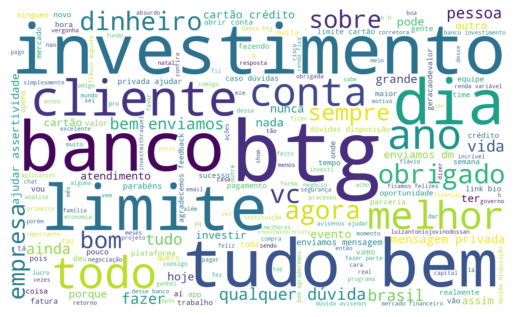

In [30]:
# WordCloud
# Criando um objeto WordCloud com as configurações desejadas
wordcloud = WordCloud(width=2000, height=1200, background_color='white').generate(' '.join(frases_pre))

# Mostrando a imagem da nuvem de palavras
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [31]:
# Vizualização gráfica da frequência e dispersão das palavras
n = 10
top_n = freq_dist.most_common(n)
frequencias = [freq for palavra, freq in top_n]
palavras = [palavra for palavra, freq in top_n]
fig = make_subplots(rows=2, cols=1, subplot_titles=('Frequência de Palavras', 'Dispersão de Palavras'))

fig.add_trace(go.Bar(x=palavras, y=frequencias,
                     marker={'color': 'rgb(6,57,112)'}),
              row=1, col=1)

fig.add_trace(go.Scatter(x=list(freq_dist.keys()), y=list(freq_dist.values()), mode='markers'),
              row=2, col=1)

fig.update_layout(showlegend=False, height=1000, title_text='Frequência de Palavras', plot_bgcolor='white')
fig.show()

### - Conjunto de três palavras com maior frequência
#### A fim de ter maior arcabouço de palavras frequentes nos comentários, opta-se pela seleção dos conjuntos de três palavras.

In [32]:
from nltk import ngrams

trigrams = []

for frase in frases_pre:
    words = frase.split()
    trigrams += list(ngrams(words, 3))
# Contar a frequência dos trigramas
freq_tri = nltk.FreqDist(trigrams)

# Ordenar as frequências em ordem decrescentetop
top = freq_tri.most_common(100)
top


[(('tudo', 'bem', 'enviamos'), 94),
 (('enviamos', 'mensagem', 'privada'), 62),
 (('mensagem', 'privada', 'ajudar'), 56),
 (('bem', 'enviamos', 'dm'), 48),
 (('bem', 'enviamos', 'mensagem'), 46),
 (('caso', 'dúvidas', 'disposição'), 45),
 (('privada', 'ajudar', 'assertividade'), 41),
 (('qualquer', 'dúvida', 'avisenos'), 31),
 (('dúvida', 'avisenos', 'ajudar'), 29),
 (('qualquer', 'dúvida', 'disposição'), 28),
 (('tudo', 'bem', 'agradecemos'), 27),
 (('enviamos', 'dm', 'possamos'), 23),
 (('dm', 'possamos', 'ajudar'), 23),
 (('possamos', 'ajudar', 'assertividade'), 23),
 (('qualquer', 'dúvida', 'avise'), 22),
 (('tudo', 'bem', 'ficamos'), 21),
 (('ajude', 'conquistar', 'premiação'), 21),
 (('conquistar', 'premiação', 'vote'), 21),
 (('premiação', 'vote', 'btg'), 21),
 (('vote', 'btg', 'link'), 21),
 (('ajudar', 'assertividade', 'aguardo'), 21),
 (('bem', 'ficamos', 'felizes'), 20),
 (('envie', 'mensagem', 'privada'), 20),
 (('mensagem', 'privada', 'informações'), 19),
 (('feira', 'arte

In [33]:
n = 20
top_n = freq_tri.most_common(n)
frequencias = [freq for trigram, freq in top_n]
trigramas = [' '.join(trigram) for trigram, freq in top_n]

fig = go.Figure(go.Bar(x=trigramas, y=frequencias, marker={'color': 'rgb(6,57,112)'}))

fig.update_layout(title='Frequência de Trigramas', xaxis_title='Trigramas', yaxis_title='Frequência')
fig.show()

### - Relação determinística entre as colunas Anomalia e Comentário
#### Durante o recebimento da base de dados, haviam-se dúvidas a respeito do significado dos dados contidos na coluna Anomalia. Portanto, estrutura-se a hipótese que busca identificar relações entre os comentários (foco da análise no geral) e a coluna Anomalia.

In [34]:
#Configurações para retirar o limite de colunas e linhas 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [35]:
# Seleção das colunas relevantes para a análise
df_anomalia = df_1[['texto', 'anomalia']].astype(str)
#Tirando nulos, existia apenas 100
df_anomalia = df_anomalia.dropna(axis=1)

In [36]:
df_anomalia

,texto,anomalia
10,@gustavopaulinno Realmente. Ja rodei por aí e ...,-1.0
13,👏👏👏,-1.0
14,"O app está travando desde ontem, está em manut...",-1.0
15,"Abri uma conta, mas achei muito complicado inv...",-1.0
16,👏,-1.0
17,"Prezados, o app btg banking está fora do ar o ...",-1.0
18,Estou impressionada com o trabalho maravilhoso...,-1.0
19,Alguém recomenda ter cartão com eles?,-1.0
20,"Qual o valor da taxa de corretagem, pois ainda...",-1.0
21,Tem como aplicar também manual escolhe por ações,-1.0


In [37]:
#Método para conferir os resultados sem repetição da coluna anomalia (.unique()) 
valores_unicos_anomalia = df_1['anomalia'].unique()
print(valores_unicos_anomalia)

[-1.]


In [38]:
#Agrupamento aleatório de linhas para cada tipo de resultado na coluna anomalia
amostra = df_1.groupby('anomalia').apply(lambda x: x.sample(20))
print(amostra)

               Column1       id                        autor  \
anomalia                                                       
-1.0     1335     1335     1336          luiz_a.j.dos_santos   
         3045     3045  1567225         calebe.cpconsultoria   
         2983     2983  1427775               braga_anacarol   
         623       623      624                     eduideia   
         303       303      304                    zepolenta   
         395       395      396                    mocafilho   
         338       338      339       rogeriobandeiraalmeida   
         181       181      182             claudiagodoy2019   
         1294     1294     1295               american_plus_   
         3674     3674  2579346                chilenoealana   
         942       942      943               neidesouza1986   
         2010     2010   517777               anaatmarketing   
         4252     4252  2968920         diegovargasribeirode   
         2488     2488   864487         

### - Uso de Emoji na Base de dados

#### O objetivo desta hipótese é entender quais são emojis que mais aparecem no dataset e qual seria o melhor tratamento paraos mesmos, com o intuito de que a análise de sentimento seja mais precisa, com base nas aparições no dataset.




In [39]:
comentarios = df_1.dropna() # Drop comments nulos 
texto = "".join(comentarios["texto"]).lower()

In [40]:
count = emoji.emoji_count(texto) # Contar a quantidade de emojis 

print(f"possui {count} emojis.")

possui 4614 emojis.


In [41]:
emoji_dict = dict(Counter(c for c in texto if emoji.is_emoji(c))) # Contagem de emojis do dicionario

most_common_emojis = Counter(emoji_dict).most_common(15) # Top 15 emojis mais utilizados nos comentários

total_emojis = sum(emoji_dict.values()) # Cálculo da porcentagem de aparição de cada emoji
emoji_percentages = {k: v / total_emojis for k, v in most_common_emojis}

df = pd.DataFrame({'emoji': list(emoji_percentages.keys()), 'percentage': list(emoji_percentages.values())}) # Dataframe dos resultados

df = df.sort_values(by='percentage', ascending=False)# Ordena os resultados por porcentagem decrescente

print(df)

   emoji  percentage
0      👏    0.372046
1      🔥    0.043806
2      🚀    0.042176
3      😍    0.041361
4      💙    0.035452
5      🏻    0.035045
6      ❤    0.027710
7      🙌    0.026895
8      😂    0.023431
9      🏼    0.018337
10     😢    0.011410
11     🙏    0.011002
12     ✔    0.010595
13     🏽    0.009780
14     ♂    0.009576


# Etapa 2 - Pré processamento

## As etapas de pré-processamento em um projeto de análise de sentimento têm como objetivo preparar os dados textuais para que possam ser analisados por um modelo de aprendizado de máquina.

## DataSet com Tag de positivo, negativo e neutro

In [42]:
df_2 = pd.read_csv('/content/drive/MyDrive/Bases_dados/BaseDadosBTG2.csv')
df_2.head()

,id,"""dataPublicada""","""autor""","""texto""","""sentimento""","""tipoInteracao""","""anomalia""","""probabilidadeAnomalia""","""linkPost""","""processado""","""contemHyperlink"""
0,1,"""2022-03-04 09:38:00""",v8_capital,Confira os resultados dos nossos fundos no mês...,NEUTRAL,marcação,1,52,https://www.instagram.com/p/CarqO6drRux/,0,0
1,2,"""2022-03-04 09:29:00""",winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação,0,43,https://www.instagram.com/p/CarpQUluh7z/,0,0
2,3,"""2022-03-04 09:20:00""",marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação,0,45,https://www.instagram.com/p/CaroK9Nu8tC/,0,0
3,4,"""2022-03-04 08:36:00""",lmviapiana,Minuto touro de ouro,POSITIVE,comentário,0,38,https://www.instagram.com/p/CapXhB5Lvas/#17977...,0,0
4,5,"""2022-03-03 21:10:00""",vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta,0,17,https://www.instagram.com/p/CapXhB5Lvas/#17842...,0,0


## Limpeza dos dados

In [43]:
df_2.isnull().sum()

id                         0
"dataPublicada"            0
"autor"                    0
"texto"                    0
"sentimento"               0
"tipoInteracao"            0
"anomalia"                 0
"probabilidadeAnomalia"    0
"linkPost"                 0
"processado"               0
"contemHyperlink"          0
dtype: int64

In [44]:
df_2.isna().sum()

id                         0
"dataPublicada"            0
"autor"                    0
"texto"                    0
"sentimento"               0
"tipoInteracao"            0
"anomalia"                 0
"probabilidadeAnomalia"    0
"linkPost"                 0
"processado"               0
"contemHyperlink"          0
dtype: int64

In [45]:
duplicados = df_1[df_1.duplicated(keep = 'first')]

In [46]:
df_2 = df_1.dropna()

In [47]:
df_2.isnull().sum()

Column1                  0
id                       0
autor                    0
texto                    0
shortCode                0
tipoInteracao            0
tipoMidia                0
idInteracao              0
idPai                    0
URL                      0
dataPublicada            0
dataInsercao             0
anomalia                 0
probabilidadeAnomalia    0
processado               0
contemHyperlink          0
dtype: int64

In [48]:
array_comentarios = df_repete['texto'].values.flatten().astype(str)

In [49]:
df_repete.query("autor == 'btgpactual'").value_counts()

Series([], dtype: int64)

## Pipeline 
### Utiliza-se o pipeline com a finalidade de evidenciar as etapas utilizadas nesse processo, demonstando que os outputs de um procedimento torna-se input da sequente.
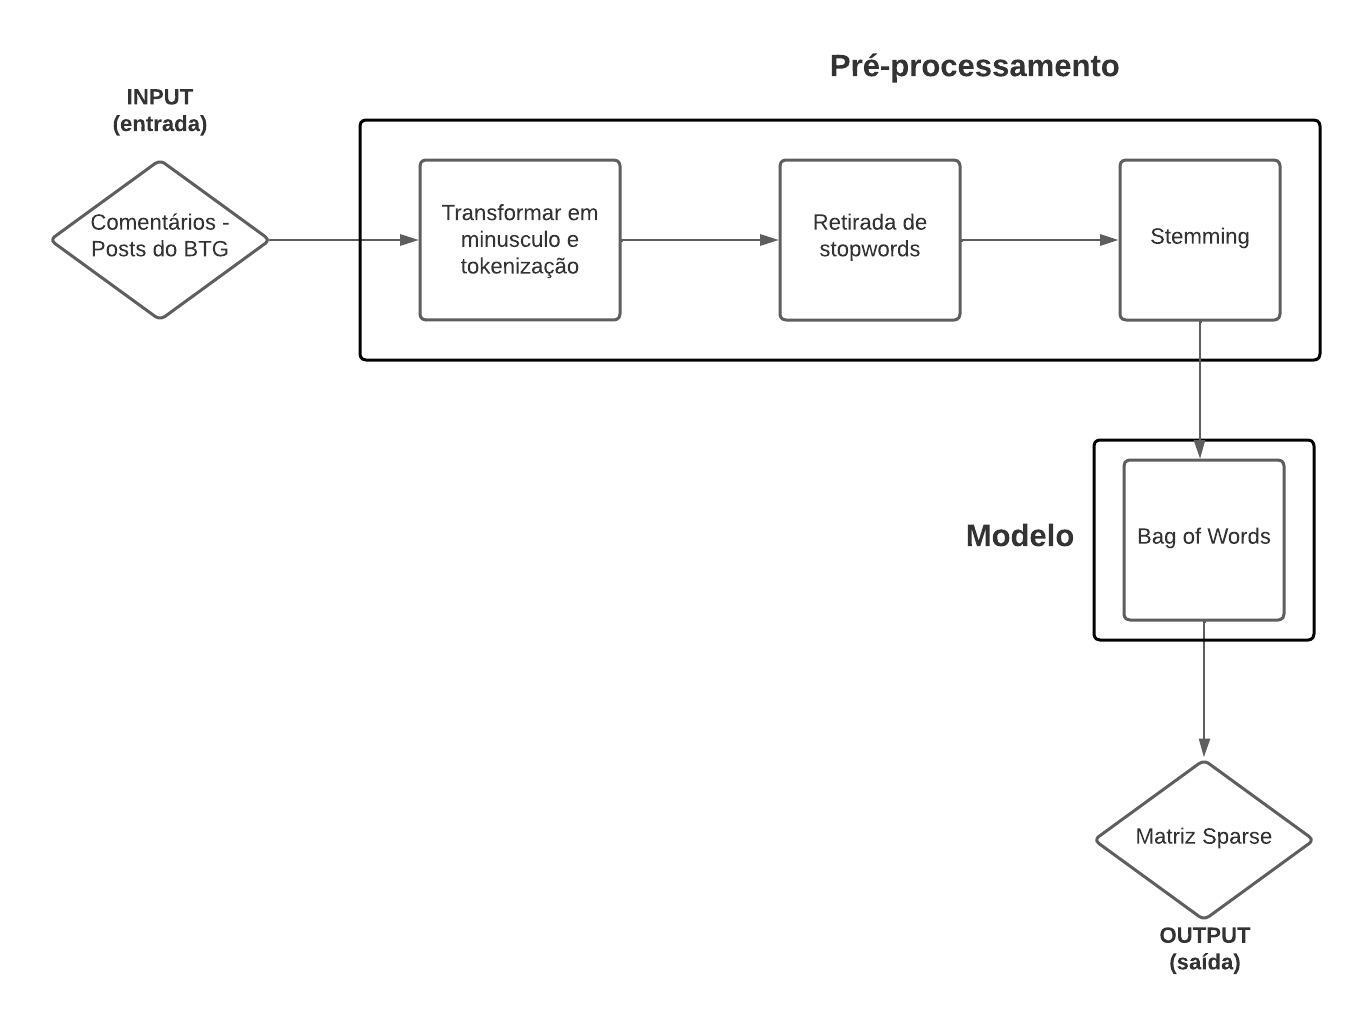

##Testando etapas de Pré Processamento

###Estruturação

#### Inicialmente, retira-se informações nulas, legendas e comentários do próprio BTG Pactual do dataset.

In [50]:
#Retirando valores nulos
df_textoAutor = df_2[['autor', 'texto']].dropna()
#Retirando posts do btg
df_textoAutor = df_2.drop(df_1[df_1['autor'] == 'btgpactual'].index)
df_textoAutor.shape

(3501, 16)

In [51]:
#Retirando uma frase teste do banco e deixando toda em minúsculo
sentence_teste = df_2['texto'].iloc[100].lower()
sentence_teste

'@andre.kliousoff preciso de um bom assessor!'

###Tokenização

#### Em seguida, realiza-se a tokenização a fim de dividir o texto em unidades menores, como palavras ou frases, para que possa ser analisado com maior facilidade.

In [52]:
#tokenizando o texto
tokens = sentence_teste.lower().split()

In [53]:
#teste
tokens

['@andre.kliousoff', 'preciso', 'de', 'um', 'bom', 'assessor!']

### Stop-Words

#### Já a eliminação de stop-words, retira do dataset palavras que não agregam valor semântico para a análise.

In [54]:
# Removendo números, pontuação e caracteres especiais
sentence_teste = sentence_teste.translate(str.maketrans('', '', string.punctuation))
sentence_teste = sentence_teste.strip()

In [55]:
#Teste 
sentence_teste

'andrekliousoff preciso de um bom assessor'

In [56]:
#Removendo stop-words e adicionando novas stop words ao corpus nltk
stop_words = set(nltk.corpus.stopwords.words('portuguese'))
stop_words_add = ['ola', 'olá', 'pra', 'para', 'bemvindo','benvindo', 'bem-vindo', 'bemvindos', 'aqui', 'vai', 'btgpactual']
stop_words.update(stop_words_add)
new_words = []
for word in sentence_teste:
    if word not in stop_words:
        new_words.append(word)
        sentence_teste = ''.join(new_words)
        

In [57]:
#Teste
sentence_teste

'ndrkliusff prcis d um bm ssssr'

### Testando corretor de palavras

#### Evidencia-se o teste de bibliotecas que corrigem palavras escritas de forma errônea, característica recorrente nas redes sociais, e melhorar a assertividade do modelo.

In [58]:
!pip install pyspellchecker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
#Corrigindo erros 
from spellchecker import SpellChecker
frase_errada = 'As veses estol gostandu di vose'
words = frase_errada.split()
spell = SpellChecker(language='pt')

In [60]:
#Teste
for word in words:
    print(spell.correction(word))

#Era esperado retornar de e você. Porém houve algumas correções interessantes.

As
vezes
estou
gostando
di
vos


In [61]:
#Teste com a sentença teste para ver se modifica algum resultado
for word in sentence_teste.split():
    print(spell.correction(word))

#Retornou palavras com # no começo, ou palavras fora do dicionário como btgpactual ele retornou none. Nos emoji retornou uma letra. De restante as palavras foram corretas.
#Portanto seria interessante fazer o tratamento dos emojis antes e realizar uma condição de que seja none, não realize a correção da palavra

ndrkliusff
preciso
d
um
um
assar


###Testando corretor de abreviações e deletar emojis
#### Assim como as palavras escritas de maneira errônea, o uso de abreviações e emojis fazem parte da comunicação utilizadas nas redes sociais. Portanto, testa-se as bibliotecas que trazem a palavra completa no lugar das abreviações e deleta os emojis da frase.

In [62]:
!pip install enelvo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 20.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234911 sha256=0039615007a8fde77a2b50527c0bead93d8b5135c41ee31586a8d8f2f338fcf9
  Stored in directory: /root/.cache/pip/wheels/02/3d/88/51a592b9ad17e7899126563698b4e3961983ebe85747228ba6
Successfully built emoji
  Attempting uninstall: emoji
    Found existing installation: emoji 2.4.0
    Uninstalling emoji-2.4.0:
      Successfully uninstalled emoji-2.4.0


In [63]:
from enelvo.normaliser import Normaliser
#Criando mensagem para correções
msg = 'hj vou usar meu cartão do banco btg, pq gosto mt dele👊'
# instanciando
norm = Normaliser(tokenizer='readable')

In [64]:
#teste
resposta = norm.normalise(msg)
print(resposta) 
#Corrigiu corretamente as abreviações, porém houve uma erro de concordância, 'muita dele'

hoje vou usar meu cartão do banco pactual , porque gosto muita dele 👊


In [65]:
#teste na sentença teste
for word in sentence_teste.split():
    print(norm.normalise(word))

#mudou a palavra btgpactual, para pactual, tentou normalizar algumas palavras porém deu erro

ERROR:enelvo.normaliser:Failed to normalise word "ndrkliusff"!


ndrkliusff
paris
de
um
bem
sessar


In [66]:
#Removendo emoji
sanitizer = Normaliser(sanitize=True)

In [67]:
#teste 
sanitizer.normalise(msg)
#Retirou o emoji

'hoje vou usar meu cartão do banco pactual porque gosto muita dele'

###Testando o stemming

#### O processamento de stemmatização dos comentários corresponde à redução das palavras para a sua raiz, com o propósito de mapear as mesmas raízes com maior facilidade.

In [68]:
#Instanciando
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('portuguese')

In [69]:
#teste
for word in sentence_teste.split():
    print(stemmer.stem(word))
#Realmente reduziu as palavras, mas algumas serião desnecessários, como fredpomp

ndrkliusff
prcis
d
um
bm
ssssr


###Stemming

In [70]:

import string
import nltk
from nltk.stem.snowball import SnowballStemmer

def preprocess_stem(sentence):
    sentence = sentence.translate(str.maketrans('', '', string.punctuation))
    sentence = sentence.strip()

        # Transforma todas as letras em minúsculas
    sentence = sentence.lower()

    # Remove números, pontuação e caracteres especiais
    sentence = sentence.translate(str.maketrans('', '', string.punctuation))
    sentence = sentence.strip()

    # Tokeniza a frase em palavras
    words = sentence.split()

    # Criar um stemmer para o idioma português
    stemmer = SnowballStemmer('portuguese')

    # Remove as stopwords
    stop_words = set(nltk.corpus.stopwords.words('portuguese'))
    stop_words_add = ['ola', 'olá', 'pra', 'para', 'bemvindo','benvindo', 'bem-vindo', 'bemvindos', 'aqui', 'vai']
    stop_words.update(stop_words_add)
    stemmed_words = [stemmer.stem(word) for word in words if word not in stop_words]

    # Remove palavras que são nulas
    stemmed_words = filter(None, stemmed_words)


    # Junta as palavras novamente em uma única string
    sentence = ' '.join(stemmed_words)

    return sentence

In [71]:
#Teste
frase = df_2['texto'].iloc[200]
print(frase)
print()
print(preprocess_stem(frase))

@btgpactual estou com problemas sobre cobrança de plataforma. Cancelei minha plataforma durante um mês pois eu não iria operar, e agora estão me cobrando pela utilização da plataforma! Em prol do bom relacionamento que tenho com vcs, podem me ajudar a resolver isso?

btgpactual problem sobr cobranc plataform cancel plataform durant mês pois iri oper agor cobr utiliz plataform prol bom relacion vcs pod ajud resolv


### Função de pré-processamento

In [72]:
def pipeline(dataset):
    # Transforma todas as letras em minúsculas
    dataset = dataset.lower()

    # Remove números, pontuação e caracteres especiais
    dataset = dataset.translate(str.maketrans('', '', string.punctuation))
    dataset = dataset.strip()

    # Tokeniza a frase em palavras
    words = dataset.split()

    # Criar um stemmer para o idioma português
    stemmer = SnowballStemmer('portuguese')

    # Remove as stopwords
    stop_words = set(nltk.corpus.stopwords.words('portuguese'))
    stop_words_add = ['ola', 'olá', 'pra', 'para', 'bemvindo','benvindo', 'bem-vindo', 'bemvindos', 'aqui', 'vai']
    stop_words.update(stop_words_add)
    stemmed_words = [stemmer.stem(word) for word in words if word not in stop_words]

    # Remove palavras que são nulas
    stemmed_words = filter(None, stemmed_words)


    # Junta as palavras novamente em uma única string
    dataset = ' '.join(stemmed_words)

    return dataset

In [73]:
frases_pre = []
for frase in df_textoAutor['texto'].astype(str).dropna():
    pre_pt = pipeline(frase)
    frases_pre.append(pre_pt)

frases_pre

['gustavopaulinn realment ja rod aí observ q quesit invest btgpactual númer',
 '👏👏👏',
 'app trav desd ontem manutençã',
 'abri cont ache complic invest rend variável app confus sai',
 '👏',
 'prez app btg banking ar dia tod dificuld vid oq acontec',
 'impression trabalh maravilh bem feit arrisqu dar chanc 300 receb pagament 5150 obrig jessicaallenfxtrad',
 'alguém recomend ter cartã',
 'valor tax corretag pois aind sei',
 'aplic manual escolh açõ',
 'exigent banc super nunc ped nad liber cartã limit ótim tud perfeit',
 'tá falt zer corretagens açõ aí fic top',
 '💙',
 'outr igual btg melhor',
 'melhor equip research 💪',
 'banc ecelent porém difícil consegu limit tud fac ped fot rost vez rua moviment fic chat sempr cheg notific transferent pix compr dá ler mensag complet pós fic falt',
 'cheg hor ter cartã créditot aprov demaisdigi liber 5 mil limit ótim cartã crédit aprov dem quer link indic p aprov facilit coment algo mand msg direct boa sort obrig',
 'melhor❤️❤️ 👏🏻👏🏻ador faz part td is

In [74]:

# Dados após o pré-processamento
dados_preprocessados = frases_pre

# Caminho para o arquivo CSV de saída
caminho_arquivo_csv = "resultado_preprocessamento.csv"

# Escrever os dados no arquivo CSV
with open(caminho_arquivo_csv, mode='w', newline='') as arquivo_csv:
    writer = csv.writer(arquivo_csv, delimiter=',')
    writer.writerow(["Pré-processamento"])  # Escreve o cabeçalho
    writer.writerows(dados_preprocessados)  # Escreve os dados

print("Arquivo CSV gerado com sucesso!")

Arquivo CSV gerado com sucesso!


# Etapa 3 - Modelo Bag of Words

 O modelo Bag of Words correponde a uma representação do texto de acordo com a ocorrência das palavras nele. O output esperado é um vetor, no qual, cada elemento desse corresponderá a uma palavra do vocabulário.

In [75]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [76]:
vectorizer = CountVectorizer()
vectorizer.fit(frases_pre)
# vectorizer.fit(palavras)
print(sorted(vectorizer.vocabulary_))

['00', '000', '00000', '0050', '01', '02', '02122022', '0312', '04', '040', '05', '05012023', '062', '06964103', '075', '08', '0800', '0825', '082btc', '0900', '0911', '09dez2022', '0km', '0xandrey', '10', '100', '1000', '10000', '10029', '100k', '101', '10500', '10760', '1086', '10h', '11', '1100', '1100000000', '110m', '111122', '1112', '112', '1145', '11500', '117', '11800', '11h', '11pts', '12', '120', '1200', '12000', '120000', '120m', '1212', '123', '1236', '12500', '12560', '12600', '12750', '12h', '13', '130', '13000', '1300000', '13012023', '1307', '1324', '13500', '135m', '13644', '1375', '13h', '14', '14000', '140m', '141', '1412', '141501', '14200', '1425', '1441', '145', '14500usd', '145160m', '145700', '14684', '1475', '14h', '15', '150', '1500', '15000', '150m', '15122022de', '1550', '15500', '155m', '156', '15800', '1599', '15h', '15k', '16', '160', '1600', '1600000', '16400', '165', '166', '16h', '17', '1700', '17000', '17112022', '175', '175000', '17600', '17h', '18',

In [77]:
vector = vectorizer.transform(frases_pre)
#vector = vectorizer.transform(palavras)
# Sumariza
print(vector.shape)
print(vector.toarray())

(3501, 7475)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [78]:
df = pd.DataFrame(vector.toarray())
print(df.head())

   0     1     2     3     4     5     6     7     8     9     10    11    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   12    13    14    15    16    17    18    19    20    21    22    23    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   24    25    26    27    28    29    30    31    32    33    34    35   

# TFID


 O TfidVectorizer calcula o inverso das frequências e codifica os vetores a fim de calcular a relevância de cada termo nos documentos. Diferente do CountVectorizer, este algoritmo calcula 'word frequencies'. Isso impede que, por exemplo, artigos ou palavras não muito significantes acabem sendo reconhecidos como muito relevantes apenas pelo grande número de ocorrências na base de dados, uma vez que essa frequência inversa leva mais em conta o contexto das palavras empregadas em cada frase.

In [79]:
vectorizer = TfidfVectorizer()
vectorizer.fit(frases_pre)
print(sorted(vectorizer.vocabulary_))
vector = vectorizer.transform([frases_pre[0]])

['00', '000', '00000', '0050', '01', '02', '02122022', '0312', '04', '040', '05', '05012023', '062', '06964103', '075', '08', '0800', '0825', '082btc', '0900', '0911', '09dez2022', '0km', '0xandrey', '10', '100', '1000', '10000', '10029', '100k', '101', '10500', '10760', '1086', '10h', '11', '1100', '1100000000', '110m', '111122', '1112', '112', '1145', '11500', '117', '11800', '11h', '11pts', '12', '120', '1200', '12000', '120000', '120m', '1212', '123', '1236', '12500', '12560', '12600', '12750', '12h', '13', '130', '13000', '1300000', '13012023', '1307', '1324', '13500', '135m', '13644', '1375', '13h', '14', '14000', '140m', '141', '1412', '141501', '14200', '1425', '1441', '145', '14500usd', '145160m', '145700', '14684', '1475', '14h', '15', '150', '1500', '15000', '150m', '15122022de', '1550', '15500', '155m', '156', '15800', '1599', '15h', '15k', '16', '160', '1600', '1600000', '16400', '165', '166', '16h', '17', '1700', '17000', '17112022', '175', '175000', '17600', '17h', '18',

In [80]:
print(vectorizer.idf_)

[8.06247722 8.06247722 8.46794233 ... 8.46794233 8.46794233 8.46794233]


# Etapa 4 - Modelo Word2Vec

 Entende-se o modelo Word2Vec como método estatístico para aprender um Word Embedding independente, a partir de um corpus. Ele gera embeddings (ou representações vetoriais) que capturam relações semânticas e de contexto das palavras.

 As arquiteturas do Word2Vec (que serão exploradas posteriormente neste notebook) são treinadas usando redes neurais com uma camada oculta. Por fim, o Word2Vec, diferente do BOW, gera representações vetoriais densas e vocabulários mais robustos. 

## Lematização

 O objtivo da etapa de pré-processamento que corresponde à lematização é extrair o lemma (palavra base) dos termos que aparecem nas sentenças.


In [81]:
nlp = spacy.load("pt_core_news_lg")

In [89]:
# Substituição de emoji
for token in texto.split():
    if emoji.is_emoji(token):
        nome_emoji = emoji.demojize(token, language = 'pt')
        texto = texto.replace(token , nome_emoji)

#Retirada de caracteres especias
def remover_caracteres_especiais(texto):
    texto_sem_acentos = unicodedata.normalize('NFKD', texto).encode('ASCII', 'ignore').decode('utf-8')
    texto_sem_especiais = re.sub('[^a-zA-Z0-9 \\\]', '', texto_sem_acentos)
    return texto_sem_especiais


texto = remover_caracteres_especiais(texto)
# Tokenização e deixar palavras em letras minúsculas
tokens = texto.lower().split()

In [92]:
#Retirada de stopword
tokens_new = []
stop_words = ['eu', 'tu', 'ele', 'ela', 'nós', 'nos', 'vós', 'vos' 'eles', 'elas', 
'isso', 'isto', 'aquilo', 'algum', 'alguma', 'alguns', 'algumas',
'outro', 'outra', 'outros', 'outras', 'tão', 'tal', 'tanto', 'tanta', 'tantos', 'tantas', 
'seu', 'sua', 'seus', 'suas', 'dele', 'dela', 'deles', 'delas', 
'quem', 'qual', 'quais', 'que', 'onde', 'como', 'e','um', 'as', 'no'
'para', 'por', 'com', 'sem', 'sob', 'sobre', 'de', 'da', 'desde', 'em', 'entre', 'porque', 'á', 'a', 'o', 'ola', 'olá', 'pra', 'para', 'bemvindo','benvindo', 'bem-vindo', 'bemvindos', 'aqui', 'vai']
pontuacoes = ['.', ',', ';', ':', '!', '?', '-', '—', '_', '/', '\\', '(', ')', '[', ']', '{', '}', '"', "'", '`', '~', '^', '@', '#','%', '&', '*']

# Separar pontuações dos tokens
tokens_separados_pontuacao = []
for token in tokens:
    separados = re.findall(r"[\w']+|[^\w\s]", token)
    tokens_separados_pontuacao += separados

#Retirando stop_words e pontuacoes
for token in tokens_separados_pontuacao:
    if token not in stop_words and token not in pontuacoes:
        tokens_new.append(token)

tokens_new


['gustavopaulinno',
 'realmente',
 'ja',
 'rodei',
 'ai',
 'observei',
 'q',
 'no',
 'quesito',
 'investimentos',
 'btgpactual',
 'numero',
 'ummaosaplaudindomaosaplaudindomaosaplaudindoo',
 'app',
 'esta',
 'travando',
 'ontem',
 'esta',
 'manutencaoabri',
 'uma',
 'conta',
 'mas',
 'achei',
 'muito',
 'complicado',
 'investir',
 'renda',
 'variavel',
 'app',
 'confuso',
 'sai',
 'foramaosaplaudindoprezados',
 'app',
 'btg',
 'banking',
 'esta',
 'fora',
 'do',
 'ar',
 'dia',
 'todo',
 'dificuldando',
 'nossa',
 'vida',
 'oq',
 'esta',
 'acontecendoestou',
 'impressionada',
 'trabalho',
 'maravilhoso',
 'bem',
 'feito',
 'arrisquei',
 'dar',
 'uma',
 'chance',
 '300',
 'recebi',
 'pagamento',
 '5150',
 'muito',
 'obrigado',
 'jessicaallenfxtradesalguem',
 'recomenda',
 'ter',
 'cartao',
 'elesqual',
 'valor',
 'taxa',
 'corretagem',
 'pois',
 'ainda',
 'nao',
 'seitem',
 'aplicar',
 'tambem',
 'manual',
 'escolhe',
 'acoeseu',
 'sou',
 'muito',
 'exigente',
 'mas',
 'esse',
 'banco',


In [90]:

def pipeline(texto):
    # Substituição de emojis
    texto = emoji.demojize(texto, language='pt')

    # Retirada de caracteres especiais
    texto = remover_caracteres_especiais(texto)

    # Tokenização e lower
    nlp = spacy.load("pt_core_news_lg")
    doc = nlp(texto.lower())

    # Retirada de stopwords e pontuações, lematização
    tokens_new = []
    stop_words = ['eu', 'tu', 'ele', 'ela', 'nós', 'nos', 'vós', 'vos', 'eles', 'elas', 
                  'isso', 'isto', 'aquilo', 'algum', 'alguma', 'alguns', 'algumas',
                  'outro', 'outra', 'outros', 'outras', 'tão', 'tal', 'tanto', 'tanta', 'tantos', 'tantas', 
                  'seu', 'sua', 'seus', 'suas', 'dele', 'dela', 'deles', 'delas', 
                  'quem', 'qual', 'quais', 'que', 'onde', 'como', 'e','um', 'as', 'no',
                  'para', 'por', 'com', 'sem', 'sob', 'sobre', 'de', 'da', 'desde', 'em', 'entre', 'porque',
                  'á', 'a', 'o', 'ola', 'olá', 'pra', 'para', 'bemvindo', 'benvindo', 'bem-vindo', 'bemvindos', 'aqui', 'vai']
    pontuacoes = ['.', ',', ';', ':', '!', '?', '-', '—', '_', '/', '\\', '(', ')', '[', ']', '{', '}', '"', "'", '`', '~', '^', '@', '#', '%', '&', '*']

    for token in doc:
        if token.text not in stop_words and token.text not in pontuacoes:
            tokens_new.append(token.lemma_)

    return ' '.join(tokens_new)


In [93]:
frases_pre = []
for frase in df_2['texto'].astype(str).dropna():
    pre_pt = pipeline(frase)
    frases_pre.append(pre_pt)

frases_pre

KeyboardInterrupt: ignored

In [85]:
df_lematizado = pd.read_csv('/content/drive/MyDrive/Bases_dados/lematizacao.csv')
df_lematizado.head()

,Unnamed: 0,autor,texto,sentimento,tokens
0,0,v8_capital,Confira os resultados dos nossos fundos no mês...,NEUTRAL,"['confira', 'o', 'resultado', 'de o', 'nosso',..."
1,1,winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,"['Alvarez', 'Marsal', 'estara', 'conosco', 'sp..."
2,2,marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,"['repost', 'btg', 'With', 'makerepost', 'enten..."
3,3,lmviapiana,Minuto touro de ouro,POSITIVE,"['minuto', 'touro', 'ouro']"
4,4,vanilson_dos,@ricktolledo Sim,NEUTRAL,"['Ricktolledo', 'sim']"


## Word2vec

### Teste

In [95]:
#Retirada de caracteres especias
def remover_caracteres_especiais(texto):
    texto_sem_acentos = unicodedata.normalize('NFKD', texto).encode('ASCII', 'ignore').decode('utf-8')
    texto_sem_especiais = re.sub('[^a-zA-Z0-9 \\\]', '', texto_sem_acentos)
    return texto_sem_especiais

### Funções


In [94]:
#Erros gramaticais e abreviações
#Dicionario de abreviações para substituir 
def substituir_abreviacoes(frase):
    dicionario_girias = {
    'vc': 'voce',
    'vcs':'voce',
    'Vc': 'voce',
    'pq': 'porque',
    'tbm': 'tambem',
    'q': 'que',
    'td': 'tudo',
    'blz': 'beleza',
    'flw': 'falou',
    'kd': 'cade',
    'to': 'estou',
    'mt': 'muito',
    'cmg': 'comigo',
    'ctz': 'certeza',
    'jah': 'ja',
    'naum': 'nao',
    'ta': 'esta',
    'eh': 'e',
    'vlw': 'valeu',
    'p': 'para',
    'qnd': 'quando',
    'msm': 'mesmo',
    'fzr': 'fazer',
    'agr': 'agora',
    'btgpactual': 'btg',
    'pactual': 'btg',
    }
    palavras = frase.split()
    for i, palavra in enumerate(palavras):
        if palavra in dicionario_girias:
            palavras[i] = dicionario_girias[palavra]
    return ' '.join(palavras)

In [96]:
def pipeline(texto):
    # Substituição de emojis
    texto = emoji.demojize(texto, delimiters=(' ', ' '), language='pt')

    # Retirada de caracteres especiais
    texto = remover_caracteres_especiais(texto)
    
    # Muda abreviações e variantes de palavras como btg
    
    texto = substituir_abreviacoes(texto)


    # Tokenização e lower
    nlp = spacy.load("pt_core_news_lg")
    doc = nlp(texto.lower())

    # Retirada de stopwords e pontuações, lematização
    tokens_new = []
    stop_words = ['eu', 'tu', 'ele', 'ela', 'nós', 'nos', 'vós', 'vos', 'eles', 'elas', 
                  'isso', 'isto', 'aquilo', 'algum', 'alguma', 'alguns', 'algumas',
                  'outro', 'outra', 'outros', 'outras', 'tão', 'tal', 'tanto', 'tanta', 'tantos', 'tantas', 
                  'seu', 'sua', 'seus', 'suas', 'dele', 'dela', 'deles', 'delas', 
                  'quem', 'qual', 'quais', 'que', 'onde', 'como', 'e','um', 'as', 'no',
                  'para', 'por', 'com', 'sem', 'sob', 'sobre', 'de', 'da', 'desde', 'em', 'entre', 'porque',
                  'á', 'a', 'o', 'ola', 'olá', 'pra', 'para', 'bemvindo', 'benvindo', 'bem-vindo', 'bemvindos', 'aqui', 'vai', 'na', 'no']
    pontuacoes = ['.', ',', ';', ':', '!', '?', '-', '—', '_', '/', '\\', '(', ')', '[', ']', '{', '}', '"', "'", '`', '~', '^', '@', '#', '%', '&', '*']

    for token in doc:
        if token.text not in stop_words and token.text not in pontuacoes:
            tokens_new.append(token.lemma_)

    return tokens_new

In [100]:
df_2['tokens_lema'] = df_2['texto'].apply(pipeline)

KeyboardInterrupt: ignored

A fonte do Word Embedding é o repositório de Word Embeddings do NILC (Núcleo Interinstitucional de Linguística Computacional), que, de acordo com o próprio site, é 'um repositório destinado ao armazenamento e compartilhamento de vetores de palavras'. 

O modelo utilizado é CBOW, ou 'Continuous Bag of Words', que representa um modelo PLN usado para processar e compreender textos. Ele trata o texto como um "saco" (bag) de palavras, onde a ordem não importa, não levando em consideração a ordem das palavras na sequência. Assim, ele tenta prever uma palavra alvo com base em seu contexto, fazendo o contrário do Skip Gram que prevê um contexto a partir de uma palavra.

In [ ]:
tokens = df_2['tokens_lema'].tolist()
# Criação do modelo Word2Vec
modelo_w2v = Word2Vec(tokens, vector_size=150, window=5, min_count=1, workers=4)

O parâmetro 'size' define a dimensionalidade dos vetores de palavra;

O parâmetro 'window' define o tamanho máximo da janela de contexto;

O parâmetro 'min_count' define a contagem mínima de ocorrências para uma palavra ser considerada;

O parâmetro 'workers' define o número de threads para treinamento paralelo (aumenta a velocidade);

In [ ]:
# Salvando modelo
modelo_w2v.save("C:\\Users\\Rodrigo.INTELI\\Downloads\\modelo\\modelo_word2vec.bin") 

In [ ]:
# Carregando no modelo
modelo = Word2Vec.load("C:\\Users\\Rodrigo.INTELI\\Downloads\\modelo\\modelo_word2vec.bin") 

In [ ]:
# Função para vetorizar um token
def vetorizar_token(token):
    vetor = np.zeros(modelo_w2v.vector_size) #incializa vetor de zeros com a mesma dimensão
    if token in modelo_w2v.wv: #verifica se a palavra está no word2vec treinado
        vetor = modelo_w2v.wv[token] #adiciona o valor do vetor
    return vetor

# Função para vetorizar uma frase
def vetorizar_frase(frase):
    vetores_tokens = [vetorizar_token(token) for token in frase] # verifica cada token da lista
    return np.sum(vetores_tokens, axis=0) # retorna a soma dos vetores

# Aplicar a função 'vetorizar_frase' a todas as frases
df_2['vetores'] = df_2['tokens_lema'].apply(vetorizar_frase)
df_2

In [ ]:
# Acrescenta uma coluna no dataste com a soma dos vetores
df_texto['soma_vetores'] = df_texto['vetores'].apply(lambda x: np.sum(x, axis=0))
df_2

In [101]:
# Acrescenta a coluna de tokens passados pelo tratamento de lematização
df_2['tokens_lema'] = np.array(df_texto['tokens_lema'])
# Acrescenta a coluna de sentimento
df_2['sentimento'] = df['sentimento'].map({'NEUTRAL': 0, 'POSITIVE': 1, 'NEGATIVE': -1})
df_2

NameError: ignored

In [ ]:
# Criando um arquivo csv do novo dataset
df_2.to_csv('df_novo.xlsx', index=False)

In [ ]:
df_novo = pd.read_csv("C:\\Users\\Rodrigo.INTELI\\Downloads\\df_novo3.xlsx")
df_novo

In [ ]:
df_vec = pd.read_csv('')

In [ ]:
sentence_table = []

#Pecorre cada token e faz seu vetor correspondente
for sentence in df_2['tokens_lema']:
    word_vectors = [modelo_w2v.wv[word] for word in sentence if word in modelo_w2v.wv]
    if len(word_vectors) > 0:
        sentence_vector = sum(word_vectors) / len(word_vectors)
    else:
        sentence_vector = [None] * 150 # Cria uma lista de 150 elementos None
    sentence_table.append((sentence, *sentence_vector[:150]))  # Adiciona apenas os primeiros 150 elementos do vetor

column_labels = ['tokens_lema']

#looping para adicionar a coluna vetor com seu número correspondente
for i in range(150):
    column_labels.append(f'vec{i+1}')
    
# Cria um novo DataFrame com os vetores de sentença
df_vec = pd.DataFrame(sentence_table, columns=column_labels)
# Define o índice do DataFrame df_vec como o mesmo índice de df_texto['sentimento']
df_vec.set_index(df_2["sentimento"].index, inplace=True)
# Adiciona a coluna 'sentimento' ao DataFrame df_vec a partir de df_texto['sentimento']
df_vec['sentimento'] = df_2["sentimento"]

In [ ]:
df_vec.to_csv('df_vec.csv', index=False) # Baixando tabela de vetores

In [ ]:
# Leitura da tabela de vetores
df_vec = pd.read_csv("C:\\Users\\Rodrigo.INTELI\\Downloads\\df_vec.csv") 

In [ ]:
# Retirando valores vazios
df_vec = df_vec.dropna()

In [ ]:
print(df_vec.isnull().sum())  # Verificar valores nulos
print(df_vec.isna().sum())  # Verificar valores vazios

 ### Algoritmos
 Evidencia-se os algoritmos como sequências de comandos com o objetivo de executar uma tarefa. Nesse recorte, efetua-se a classificação dos dados, de forma estatística.

#### Naives Bayes

 O classificador Naive Bayes assume que as features associadas ao modelo são independentes entre si e todas são igualmente importantes para o resultado. 

In [ ]:
dropar = df_vec[['tokens_lema', 'sentimento']]
X = df_vec.drop(columns = dropar)
y = df_vec['sentimento']
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Naive Bayes
classifier = GaussianNB()

# Treino de classificação
classifier.fit(X_train, y_train)

# Predição do teste
y_pred = classifier.predict(X_test)

# Validando modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


In [ ]:
# Calcule a acurácia nos dados de treinamento
train_accuracy = classifier.score(X_train, y_train)

# Calcule a acurácia nos dados de teste
test_accuracy = classifier.score(X_test, y_test)

# Imprima as acurácias
print("Acurácia de treinamento:", train_accuracy)
print("Acurácia de teste:", test_accuracy)

#### CatBoost

##### Já a respeito do CatBoost, destaca-se que durante o treinamento, é criado conjuntos de árvores de decisão continuamente, no qual, cada árvore conseguinte é construída reduzindo o loss das anteriores.

In [ ]:
# Crie uma instância do modelo CatBoost
classifier = CatBoostClassifier()

# Defina um dicionário de hiperparâmetros a serem ajustados
param_grid = {
    'learning_rate': [0.01, 0.1, 1.0]
}

# Crie uma instância de GridSearchCV
grid_search = GridSearchCV(classifier, param_grid=param_grid, cv=5)

# Treine o modelo com a busca em grade
grid_search.fit(X_train, y_train)

# Obtenha a melhor combinação de hiperparâmetros encontrada pela busca em grade
best_params = grid_search.best_params_

# Use o modelo com os melhores hiperparâmetros para fazer previsões no conjunto de testes
y_pred = grid_search.predict(X_test)

 A taxa de aprendizado ('learning rate') é um hiperparâmetro comumente usado em algoritmos de otimização para controlar a magnitude dos ajustes feitos nos parâmetros do modelo durante o treinamento. 

In [ ]:
# Evolução do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Métricas de avaliação
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

In [ ]:
# Calcule a acurácia nos dados de treinamento
train_accuracy = grid_search.score(X_train, y_train)

# Calcule a acurácia nos dados de teste
test_accuracy = grid_search.score(X_test, y_test)

# Imprima as acurácias
print("Acurácia de treinamento:", train_accuracy)
print("Acurácia de teste:", test_accuracy)
#Pelo Resultado, teremos que balancear os dados

In [ ]:
# Crie a matriz de confusão
confusion_mtx = confusion_matrix(y_test, y_pred)

# Imprima a matriz de confusão
print(confusion_mtx)